In [4]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config IntlineBackend.figure_format='svg'

# Women’s Clothing E-Commerce

This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers.

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Rating**: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

### Questions:
- What are the most rated class names of product ?
- What is the maximum age for a product review ?
- What are the Product name have most reviewed?




### Steps of the project as follows:
1. Load Dataset
2. Explore Dataset
3. Cleaning Dataset
4. Analysis and Visualization



## Load Dataset

In [5]:
# To raed the dataset 
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

## Explore Dataset

In [6]:
# To read the 5 first row 
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Unnamed: 11,Unnamed: 12
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,NaN,NaN
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,NaN,NaN
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,NaN,NaN
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,NaN,NaN
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,NaN,`


In [7]:
# we can see there are null values
# columns with numerical values are type int64, float4 , object
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               23486 non-null  int64  
 1   Clothing ID              23486 non-null  int64  
 2   Age                      23486 non-null  int64  
 3   Title                    19676 non-null  object 
 4   Review Text              22641 non-null  object 
 5   Rating                   23486 non-null  int64  
 6   Recommended IND          23486 non-null  int64  
 7   Positive Feedback Count  23486 non-null  int64  
 8   Division Name            23472 non-null  object 
 9   Department Name          23472 non-null  object 
 10  Class Name               23472 non-null  object 
 11  Unnamed: 11              0 non-null      float64
 12  Unnamed: 12              1 non-null      object 
dtypes: float64(1), int64(6), object(6)
memory usage: 2.3+ MB


In [8]:
# view all columns of the dataframe
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name ', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

## Cleaning Dataset
In this step, we seek to clean the data, identify the rows and columns that contain an missing value , and delete the rows that we do not need.

In [9]:
#to drop unimportant columns and rows
df.drop(['Unnamed: 0','Title','Review Text','Unnamed: 11','Unnamed: 12','Positive Feedback Count' ], axis='columns', inplace=True)

In [10]:
# this show all columns after droped 

In [11]:
# to rename the columns Class Name 
df.rename(columns={'Class Name ': 'Product name'}, inplace=True)
df.head()

,Clothing ID,Age,Rating,Recommended IND,Division Name,Department Name,Product name
0,767,33,4,1,Initmates,Intimate,Intimates
1,1080,34,5,1,General,Dresses,Dresses
2,1077,60,3,0,General,Dresses,Dresses
3,1049,50,5,1,General Petite,Bottoms,Pants
4,847,47,5,1,General,Tops,Blouses


In [12]:
#create data frame for data which has missing values in Product name column
data=df[df['Product name'].isnull()]

In [13]:
data.head()

,Clothing ID,Age,Rating,Recommended IND,Division Name,Department Name,Product name
9444,72,25,5,1,NaN,NaN,NaN
13767,492,23,5,1,NaN,NaN,NaN
13768,492,49,5,1,NaN,NaN,NaN
13787,492,48,5,1,NaN,NaN,NaN
16216,152,36,5,1,NaN,NaN,NaN


In [14]:
# To drop values that contain missing values
df.drop(index=data.index,axis=0,inplace=True)

In [15]:
# To show the null values in each column
df.isnull().sum()

Clothing ID        0
Age                0
Rating             0
Recommended IND    0
Division Name      0
Department Name    0
Product name       0
dtype: int64

## Analysis and Visualization
In this step, we analyze some questions and visualize the data for each question related to the data set

### Q1 : What are the most rated product name ?

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23472 entries, 0 to 23485
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Clothing ID      23472 non-null  int64 
 1   Age              23472 non-null  int64 
 2   Rating           23472 non-null  int64 
 3   Recommended IND  23472 non-null  int64 
 4   Division Name    23472 non-null  object
 5   Department Name  23472 non-null  object
 6   Product name     23472 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.4+ MB


In [17]:
# to Returns the unique values for the column product name 
df['Product name'].unique()  

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', 'Chemises'], dtype=object)

In [18]:
data_Rating=df.groupby('Product name')[['Rating']].mean().sort_values(['Rating'],ascending=False).reset_index()

In [19]:
data_Rating.sort_values(['Rating'])

,Product name,Rating
19,Trend,3.815126
18,Chemises,4.000000
17,Dresses,4.150815
16,Blouses,4.154020
15,Knits,4.161677
14,Sweaters,4.179272
13,Swim,4.197143
12,Outerwear,4.198171
11,Skirts,4.245503
10,Shorts,4.255521


#### In this step this visualization the heighist rated products

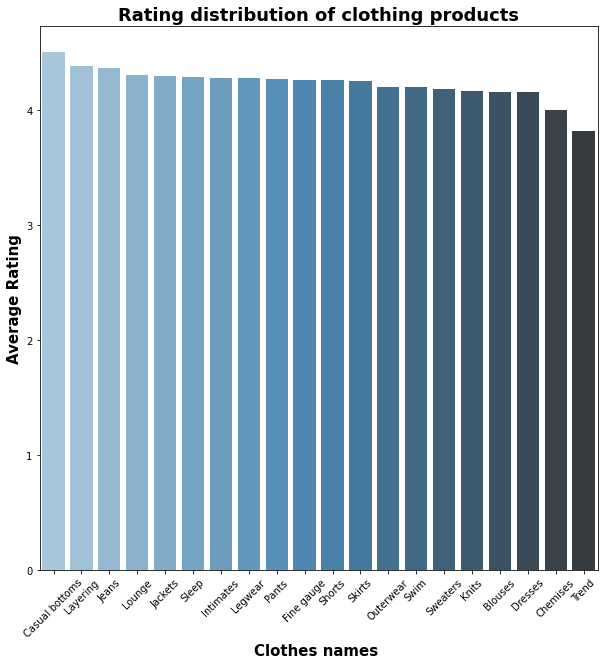

In [20]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
# make ScatterPlot to show Relationship between age and Product nam
sns.barplot(x="Product name", y="Rating", data=data_Rating,palette="Blues_d")
# set labels
plt.xlabel("Clothes names ",size=15 ,weight = 'bold')
plt.ylabel("Average Rating",size=15 ,weight = 'bold')
plt.title("Rating distribution of clothing products", size=18 ,weight = 'bold')
plt.show()


#-----------------------------------------------------




### Q2: What is the mean age for a product reviews ?

In [21]:
Product_name=df.groupby('Product name')[['Age']].mean().head(10).reset_index()

In [22]:
Product_name

,Product name,Age
0,Blouses,44.252502
1,Casual bottoms,26.500000
2,Chemises,38.000000
3,Dresses,42.114892
4,Fine gauge,44.730909
5,Intimates,39.155844
6,Jackets,43.813920
7,Jeans,43.115955
8,Knits,43.630807
9,Layering,41.527397


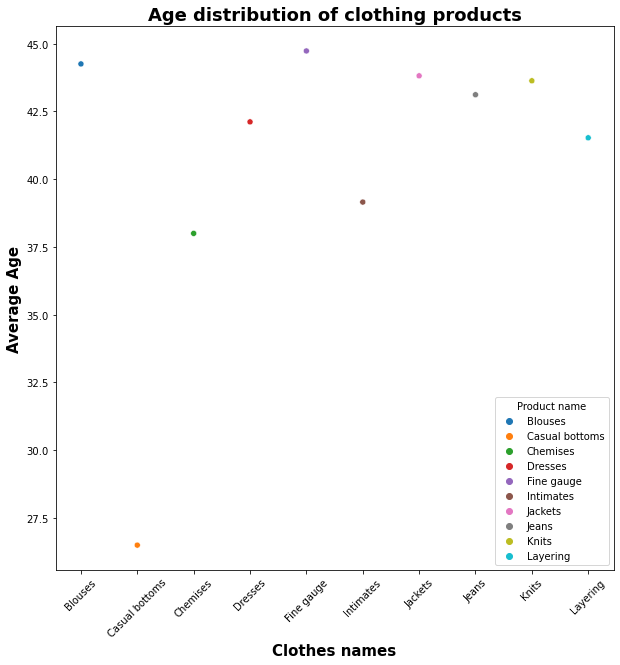

In [23]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
# make ScatterPlot to show Relationship between age and Product name  
sns.scatterplot(data=Product_name, x="Product name", y="Age", hue="Product name")
# set labels
plt.xlabel("Clothes names",size=15 ,weight = 'bold')
plt.ylabel("Average Age",size=15 ,weight = 'bold')
plt.title("Age distribution of clothing products", size=18 ,weight = 'bold')
plt.show()

### Q3:What are the top five top-rated clothing products?

In [24]:
df['Product name'].value_counts().sort_values()

Chemises             1
Casual bottoms       2
Trend              119
Layering           146
Intimates          154
Legwear            165
Sleep              228
Shorts             317
Outerwear          328
Swim               350
Lounge             691
Jackets            704
Skirts             945
Fine gauge        1100
Jeans             1147
Pants             1388
Sweaters          1428
Blouses           3097
Knits             4843
Dresses           6319
Name: Product name, dtype: int64

#### Then ,  In this step this graph visualization the highest rated products

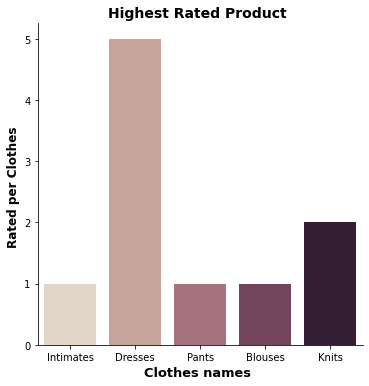

In [27]:
sns.catplot(x="Product name", kind="count", palette="ch:.25", data=df.head(10))
plt.xlabel("Clothes names ",size=13 ,weight = 'bold')
plt.ylabel("Rated per Clothes ",size=12 ,weight = 'bold')
plt.title("Highest Rated Product ", size=14 ,weight = 'bold')
plt.show()